# Machine Learning First Term Final Exam 
# Camilo Andrés Romero Maldonado
# **Email** camiloa.romero@correo.usa.edu.co
# **CC** 1020844233


## Required Imports & General Configurations

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, confusion_matrix,f1_score, roc_curve, PrecisionRecallDisplay
from google.colab import drive
import json

Setting figures size & mounting drive

In [149]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10

In [150]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Pretty print dictionaries function

In [151]:
def printDict(d):
    print(json.dumps(d,sort_keys=True, indent=4))


# Dataset Heart


## Initial exploration

### Dataset reading & exploration

In [152]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Primer Corte/heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Describing the dataset for discovering the labels and the amount of entries from the dataset. Also, some general information.

In [153]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Info provided by the teacher from the labels of the dataset.

In [154]:
print(open('/content/drive/MyDrive/ML/Primer Corte/dataHeart.txt').read())



        age
        sex
        chest pain type (4 values)
        resting blood pressure
        serum cholestoral in mg/dl
        fasting blood sugar > 120 mg/dl
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flourosopy
        thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
        The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

	target: heart attack 0 , 1



General info from the dataset that shows that there is no null entries in any in the dataset

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


As it was said before, there is no null entries in any label of the dataset, so there is no data cleaning needed. This can be reaffirmed with the following code snippet.

In [156]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Pre-Processing
There is no need to re-preprocess the dataset for each iteration, so only one preprocessing on the dataset for each iteration will be made.

### Pipeline creation
Definition of the pipeling using the simple imputer in median strategy and the standard scaler in order to have a more precise value than the obtained from the MinMaxScaler.

In [157]:
pipeline = Pipeline([('fill_data', SimpleImputer(strategy='median')),
                 ('scale_data', StandardScaler())])

### Numeric data scaling
For the numeric scaling, were selected the following columns:

* Age
* TrestBPS
* Chol
* OldPeak

These columns were used because they needed a re-scaling for having a more comprehensible information in the dataset.
In order to transform the colums, was needed to use the ColumnTransformer and the previously defined pipeline.

In [158]:
columns_to_transform = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
column_transformer = ColumnTransformer([('num_pipe', pipeline, columns_to_transform)])
transformed_columns = pd.DataFrame(column_transformer.fit_transform(dataset), columns=columns_to_transform)
dataset[columns_to_transform] = transformed_columns
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


## Split between training and test
Usage of train_test_split function to obtain the train and test sub-datasets

In [159]:
train, test = train_test_split(dataset, test_size = 0.3)

## Auxiliary functions definition
The following functions will be used on each iteration, so they will be defined before each execution.


### Filter by correlation umbral
The following function will be used to filter columns from the dataset with a higher or equal correlation value than a received umbral.

In [160]:
def filter_by_corr(dataset, target, correlation_umbral):
  corr_target = abs(dataset.corr()[target])
  corr_target_by_keys = np.extract(corr_target >= correlation_umbral, corr_target.keys())
#   np.extract(target_correlation >= correlation_umbral, target_correlation.keys())
  return corr_target[corr_target_by_keys].keys()


In [161]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
232,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
878,-0.047877,1,0,-0.663216,-1.124743,0,1,-1.570556,0,0.279688,1,1,3,0
153,-0.047877,1,2,-0.663216,0.232705,0,0,-0.091941,0,-0.571753,1,0,3,1
243,0.613800,1,2,0.479107,-1.182919,0,0,0.255968,0,1.641993,1,0,2,0
798,0.503520,1,3,2.192593,0.814469,0,0,0.429923,0,-0.742041,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,-1.812350,1,3,-0.663216,-0.290882,0,1,1.430162,1,2.323146,1,0,3,0
682,0.503520,1,0,1.849896,-1.357448,1,0,-2.570795,0,-0.060888,1,2,1,0
979,-1.040393,1,0,0.593340,1.221704,0,0,-0.091941,1,-0.912329,1,3,3,0
970,-1.812350,1,2,0.364875,-1.376841,0,1,1.038764,0,-0.912329,2,4,2,1


In [162]:
filtered_values = filter_by_corr(train, 'target', .4)
train_copy = train[filtered_values]
train_copy

,cp,thalach,exang,oldpeak,target
232,0,-0.352873,1,1.471705,0
878,0,-1.570556,0,0.279688,0
153,2,-0.091941,0,-0.571753,1
243,2,0.255968,0,1.641993,0
798,3,0.429923,0,-0.742041,0
...,...,...,...,...,...
919,3,1.430162,1,2.323146,0
682,0,-2.570795,0,-0.060888,0
979,0,-0.091941,1,-0.912329,0
970,2,1.038764,0,-0.912329,1


### Model Functions by classifier
The following functions are going to be used for applying the models that are going to be compared. These models are:
* Decission Tree
* KNeighbors
* Neural Network
These functions return the classifier related to its model that is also fitted with the received X and y training data.

To call these functions, a dictionary containg references to them will be used.

In [163]:
def decision_tree_model(X, y):
  classifier = DecisionTreeClassifier()
  classifier.fit(X, y)
  return classifier

In [164]:
def kneighbors_model(X, y):
  classifier = KNeighborsClassifier(n_neighbors=10)
  classifier.fit(X, y)
  return classifier

In [165]:
def neural_network_model(X, y):
  classifier = MLPClassifier()
  classifier.fit(X, y)
  return classifier

In [166]:
model_dict = {
    "Decision Tree": decision_tree_model,
    "KNeighbors": kneighbors_model,
    "Neural Networks": neural_network_model
}

model_dict

{'Decision Tree': <function __main__.decision_tree_model>,
 'KNeighbors': <function __main__.kneighbors_model>,
 'Neural Networks': <function __main__.neural_network_model>}

### Metrics Score functions
The following functions are going to be used for applying the models that are going to be compared. These models are:
* Accuracy
* Precision
* Recall
* F1 Measure
These functions return the score related to the metrics of the training of the previously defined models.

To call these functions, a dictionary containg references to them will be used.

In [167]:
metrics_score_dict = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Measure": f1_score
}

metrics_score_dict

{'Accuracy': <function sklearn.metrics._classification.accuracy_score>,
 'F1 Measure': <function sklearn.metrics._classification.f1_score>,
 'Precision': <function sklearn.metrics._classification.precision_score>,
 'Recall': <function sklearn.metrics._classification.recall_score>}

### Cross Validation Functions
The following functions are going to be used for applying the models that are going to be compared. These models are:
* Decission Tree
* KNeighbors
* Neural Network
These functions return the classifier related to its model that is also fitted with the received X and y training data.

To call these functions, a dictionary containg references to them will be used.

In [168]:
def cross_validation_dt(X, y):
  classifier = DecisionTreeClassifier()
  cross_validation = cross_val_score(classifier, X, y, cv=10)
  return cross_validation

In [169]:
def cross_validation_kneighbors(X, y):
  classifier = KNeighborsClassifier(n_neighbors=10)
  cross_validation = cross_val_score(classifier, X, y, cv=10)
  return cross_validation

In [170]:
def cross_validation_neural_network(X, y):
  classifier = MLPClassifier()
  cross_validation = cross_val_score(classifier, X, y, cv=10)
  return cross_validation

In [171]:
cross_val_dict = {
    "Decision Tree": cross_validation_dt,
    "KNeighbors": cross_validation_kneighbors,
    "Neural Networks": cross_validation_neural_network
}

cross_val_dict

{'Decision Tree': <function __main__.cross_validation_dt>,
 'KNeighbors': <function __main__.cross_validation_kneighbors>,
 'Neural Networks': <function __main__.cross_validation_neural_network>}

## Iteration \#1 (Umbral 20%)

### Iteration's configuration

In [172]:
umbral = .2
training_scores_it1 = {}
testing_scores_it1 = {}
cross_val_scores_it1 = {}
it_train, it_test = train.copy(), test.copy()
relevant_fields = filter_by_corr(it_train, "target", umbral)
it_train, it_test = it_train[relevant_fields], it_test[relevant_fields]

it_train

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
232,0.613800,1,0,-0.352873,1,1.471705,1,1,3,0
878,-0.047877,1,0,-1.570556,0,0.279688,1,1,3,0
153,-0.047877,1,2,-0.091941,0,-0.571753,1,0,3,1
243,0.613800,1,2,0.255968,0,1.641993,1,0,2,0
798,0.503520,1,3,0.429923,0,-0.742041,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
919,-1.812350,1,3,1.430162,1,2.323146,1,0,3,0
682,0.503520,1,0,-2.570795,0,-0.060888,1,2,1,0
979,-1.040393,1,0,-0.091941,1,-0.912329,1,3,3,0
970,-1.812350,1,2,1.038764,0,-0.912329,2,4,2,1


### Feature extraction and selection


#### Correlation heatmap

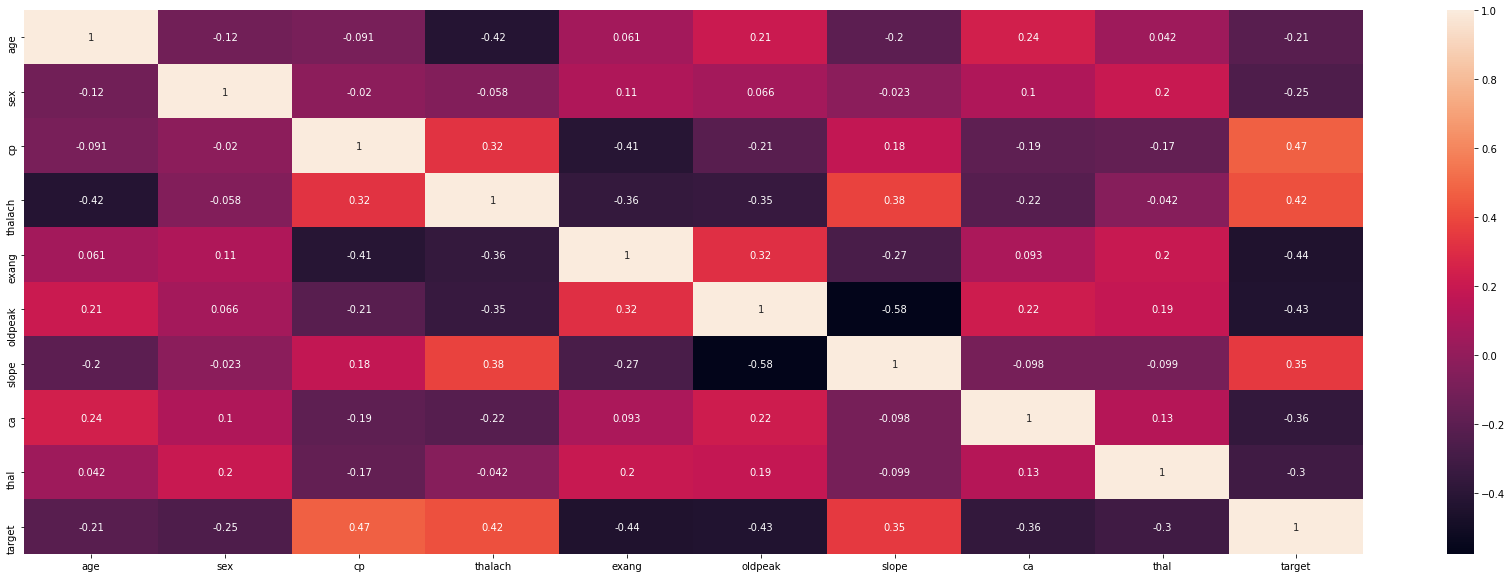

In [173]:
sns.heatmap(it_train.corr(), annot=True)

#### Scatter Matrix

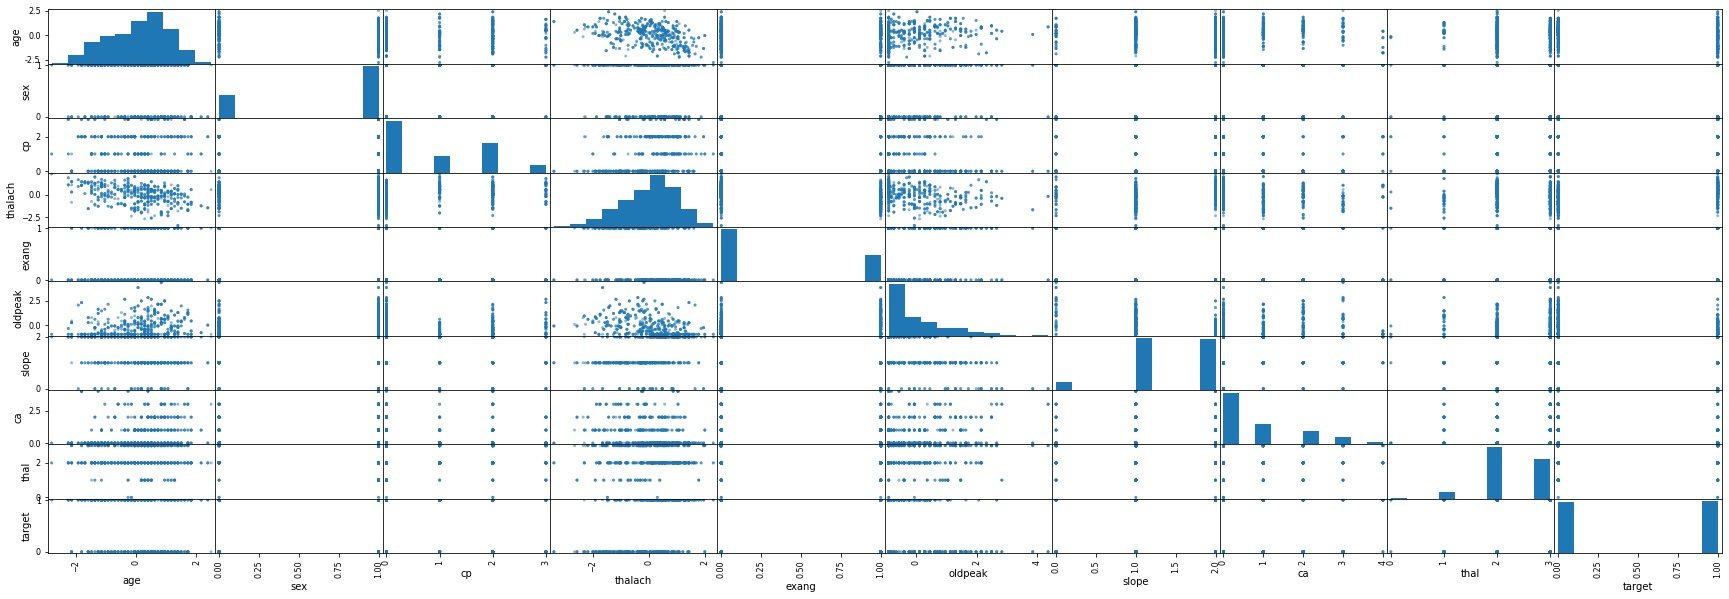

In [174]:
pd.plotting.scatter_matrix(it_train)
plt.show()

### Evaluation

Setup for train dataset

In [175]:
X_train_data = it_train.drop("target", axis=1)
y_train_data = it_train["target"]
X_train, X_eval, y_train, y_eval = train_test_split(X_train_data, y_train_data, test_size=.3)

Setup for test dataset

In [176]:
X_test_data = it_test.drop("target", axis=1)
y_test_data = it_test["target"]

Loop over the models and metrics dictionaries with references to their corresponding function in order to store in the testing and training scores dictionaries the results of all the metrics by its correspondig key-value pair

In [177]:
for model in model_dict:
    training_scores_it1[model] = {}
    testing_scores_it1[model] = {}
for model in model_dict:
    classifier = model_dict[model](X_train,y_train)
    train_prediction = classifier.predict(X_eval)
    test_prediction = classifier.predict(X_test_data)
    
    for score in metrics_score_dict:
        training_scores_it1[model][score] = metrics_score_dict[score](train_prediction, y_eval)
        testing_scores_it1[model][score] = metrics_score_dict[score](test_prediction, y_test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [178]:
printDict(training_scores_it1)

{
    "Decision Tree": {
        "Accuracy": 0.9212962962962963,
        "F1 Measure": 0.9178743961352658,
        "Precision": 0.9134615384615384,
        "Recall": 0.9223300970873787
    },
    "KNeighbors": {
        "Accuracy": 0.8240740740740741,
        "F1 Measure": 0.8173076923076923,
        "Precision": 0.8173076923076923,
        "Recall": 0.8173076923076923
    },
    "Neural Networks": {
        "Accuracy": 0.8981481481481481,
        "F1 Measure": 0.8932038834951457,
        "Precision": 0.8846153846153846,
        "Recall": 0.9019607843137255
    }
}


In [179]:
printDict(testing_scores_it1)

{
    "Decision Tree": {
        "Accuracy": 0.9025974025974026,
        "F1 Measure": 0.9096385542168675,
        "Precision": 0.9151515151515152,
        "Recall": 0.9041916167664671
    },
    "KNeighbors": {
        "Accuracy": 0.8344155844155844,
        "F1 Measure": 0.8449848024316109,
        "Precision": 0.8424242424242424,
        "Recall": 0.8475609756097561
    },
    "Neural Networks": {
        "Accuracy": 0.8798701298701299,
        "F1 Measure": 0.8908554572271387,
        "Precision": 0.9151515151515152,
        "Recall": 0.867816091954023
    }
}


In [180]:
for cv in cross_val_dict:
    cross_val_scores_it1[cv] = cross_val_dict[cv](X_train_data, y_train_data).mean()
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [181]:
printDict(cross_val_scores_it1)

{
    "Decision Tree": 0.9735133020344288,
    "KNeighbors": 0.8522496087636933,
    "Neural Networks": 0.8884585289514867
}


## Iteration \#2 (Umbral 30%)

### Iteration's configuration

In [211]:
umbral = .3
training_scores = {}
testing_scores = {}
cross_val_scores = {}
it_train, it_test = train.copy(), test.copy()
relevant_fields = filter_by_corr(it_train, "target", umbral)
it_train, it_test = it_train[relevant_fields], it_test[relevant_fields]

it_train

,cp,thalach,exang,oldpeak,slope,ca,thal,target
232,0,-0.352873,1,1.471705,1,1,3,0
878,0,-1.570556,0,0.279688,1,1,3,0
153,2,-0.091941,0,-0.571753,1,0,3,1
243,2,0.255968,0,1.641993,1,0,2,0
798,3,0.429923,0,-0.742041,1,0,3,0
...,...,...,...,...,...,...,...,...
919,3,1.430162,1,2.323146,1,0,3,0
682,0,-2.570795,0,-0.060888,1,2,1,0
979,0,-0.091941,1,-0.912329,1,3,3,0
970,2,1.038764,0,-0.912329,2,4,2,1


### Feature extraction and selection


#### Correlation heatmap

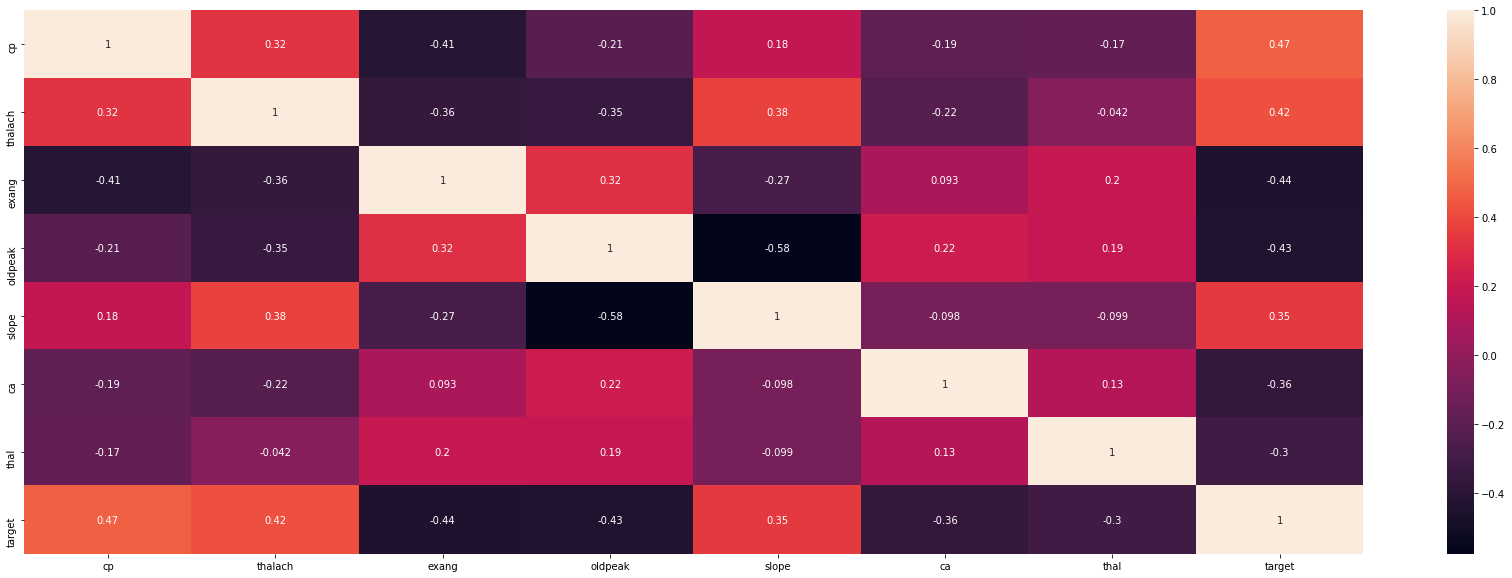

In [212]:
sns.heatmap(it_train_it2.corr(), annot=True)

#### Scatter Matrix

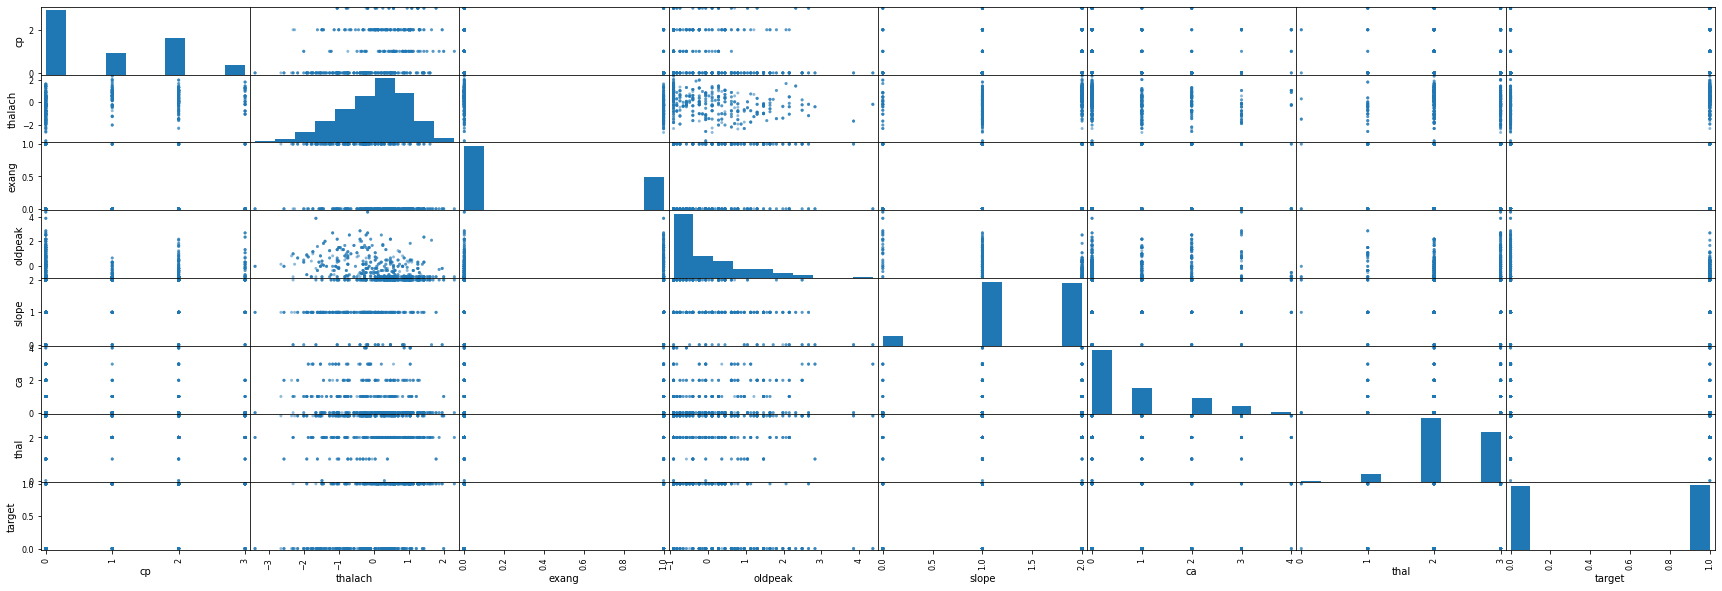

In [213]:
pd.plotting.scatter_matrix(it_train_it2)
plt.show()

### Evaluation

Setup for train dataset

In [248]:
X_train_data = it_train.drop("target", axis=1)
y_train_data = it_train["target"]
X_train, X_eval, y_train, y_eval = train_test_split(X_train_data, y_train_data, test_size=.3)

***IMPORTANT: This iteration is the best performing one, so extra variables are declared in order to make the ROC and Precision - Recall curves***

In [249]:
X_train_it2, y_train_it2 = X_train, y_train
X_train_data_it2, y_train_data_it2 = X_train_data, y_train_data

Setup for test dataset

In [215]:
X_test_data = it_test.drop("target", axis=1)
y_test_data = it_test["target"]

Loop over the models and metrics dictionaries with references to their corresponding function in order to store in the testing and training scores dictionaries the results of all the metrics by its correspondig key-value pair

In [216]:
for model in model_dict:
    training_scores[model] = {}
    testing_scores[model] = {}
for model in model_dict:
    classifier = model_dict[model](X_train,y_train)
    train_prediction = classifier.predict(X_eval)
    test_prediction = classifier.predict(X_test_data)
    
    for score in metrics_score_dict:
        training_scores[model][score] = metrics_score_dict[score](train_prediction, y_eval)
        testing_scores[model][score] = metrics_score_dict[score](test_prediction, y_test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [217]:
printDict(training_scores)

{
    "Decision Tree": {
        "Accuracy": 0.9490740740740741,
        "F1 Measure": 0.9515418502202643,
        "Precision": 0.9310344827586207,
        "Recall": 0.972972972972973
    },
    "KNeighbors": {
        "Accuracy": 0.8333333333333334,
        "F1 Measure": 0.8421052631578947,
        "Precision": 0.8275862068965517,
        "Recall": 0.8571428571428571
    },
    "Neural Networks": {
        "Accuracy": 0.8472222222222222,
        "F1 Measure": 0.8583690987124464,
        "Precision": 0.8620689655172413,
        "Recall": 0.8547008547008547
    }
}


In [218]:
printDict(testing_scores)

{
    "Decision Tree": {
        "Accuracy": 0.9415584415584416,
        "F1 Measure": 0.9451219512195123,
        "Precision": 0.9393939393939394,
        "Recall": 0.950920245398773
    },
    "KNeighbors": {
        "Accuracy": 0.8571428571428571,
        "F1 Measure": 0.8625,
        "Precision": 0.8363636363636363,
        "Recall": 0.8903225806451613
    },
    "Neural Networks": {
        "Accuracy": 0.8668831168831169,
        "F1 Measure": 0.8753799392097265,
        "Precision": 0.8727272727272727,
        "Recall": 0.8780487804878049
    }
}


In [219]:
for cv in cross_val_dict:
    cross_val_scores[cv] = cross_val_dict[cv](X_train_data, y_train_data).mean()
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [220]:
printDict(cross_val_scores)

{
    "Decision Tree": 0.9735133020344289,
    "KNeighbors": 0.8439162754303601,
    "Neural Networks": 0.871830985915493
}


## Iteration \#3 (Umbral 40%)

### Iteration's configuration

In [221]:
umbral = .4
training_scores_it3 = {}
testing_scores_it3 = {}
cross_val_scores_it3 = {}
it_train, it_test = train.copy(), test.copy()
relevant_fields = filter_by_corr(it_train, "target", umbral)
it_train, it_test = it_train[relevant_fields], it_test[relevant_fields]

it_train

,cp,thalach,exang,oldpeak,target
232,0,-0.352873,1,1.471705,0
878,0,-1.570556,0,0.279688,0
153,2,-0.091941,0,-0.571753,1
243,2,0.255968,0,1.641993,0
798,3,0.429923,0,-0.742041,0
...,...,...,...,...,...
919,3,1.430162,1,2.323146,0
682,0,-2.570795,0,-0.060888,0
979,0,-0.091941,1,-0.912329,0
970,2,1.038764,0,-0.912329,1


### Feature extraction and selection


#### Correlation heatmap

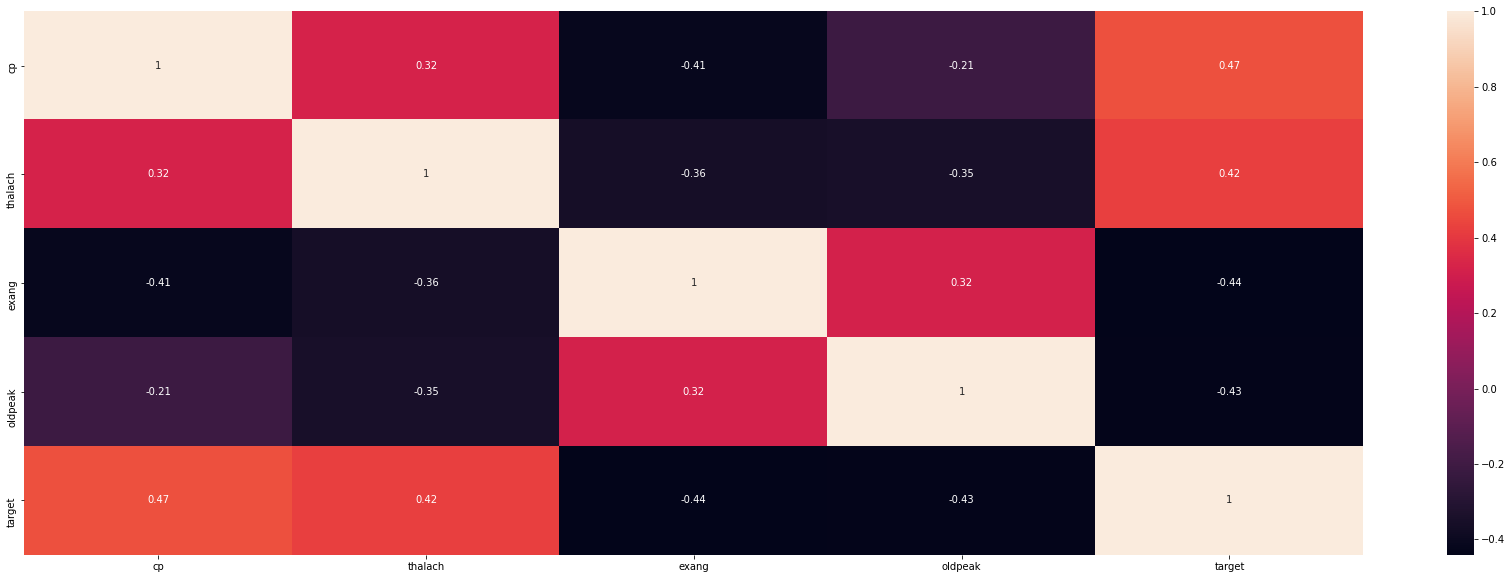

In [222]:
sns.heatmap(it_train.corr(), annot=True)

#### Scatter Matrix

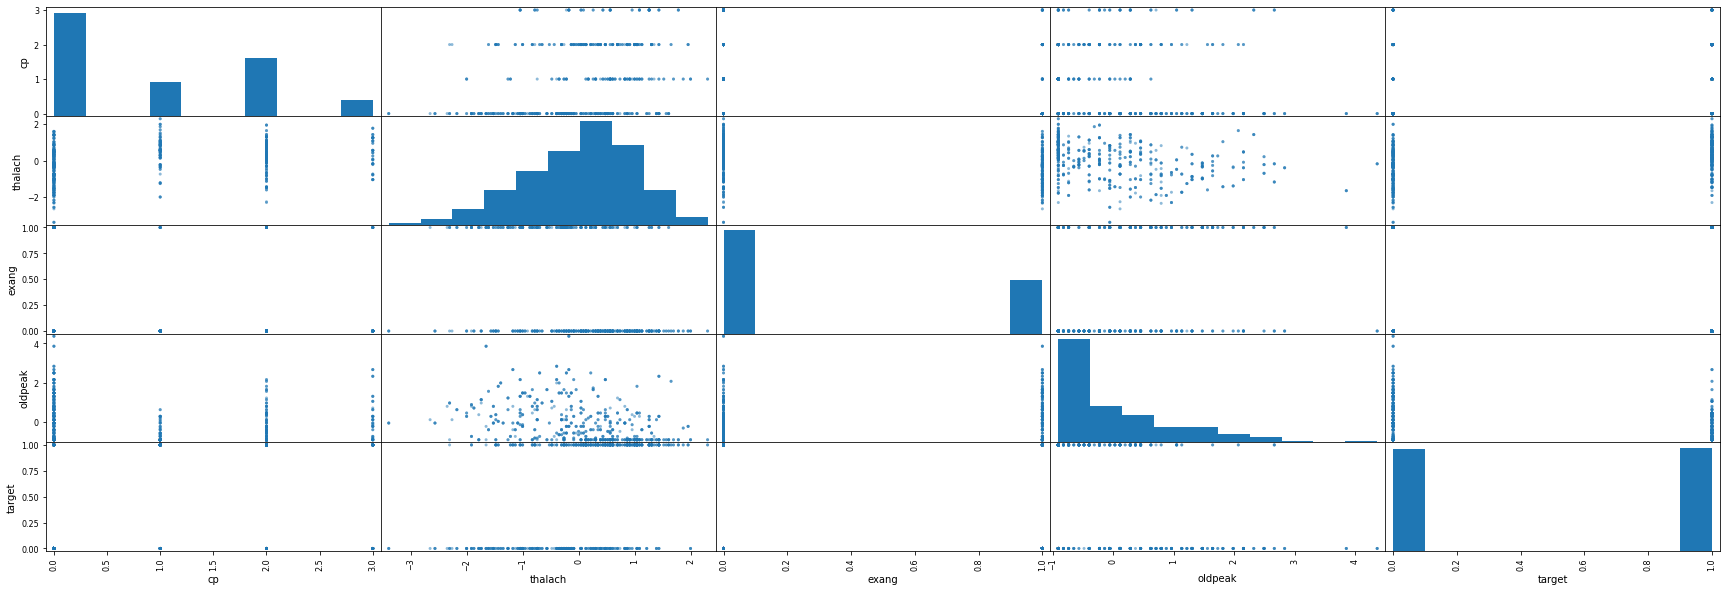

In [223]:
pd.plotting.scatter_matrix(it_train)
plt.show()

### Evaluation

Setup for train dataset

In [224]:
X_train_data = it_train.drop("target", axis=1)
y_train_data = it_train["target"]
X_train, X_eval, y_train, y_eval = train_test_split(X_train_data, y_train_data, test_size=.3)

Setup for test dataset

In [225]:
X_test_data = it_test.drop("target", axis=1)
y_test_data = it_test["target"]

Loop over the models and metrics dictionaries with references to their corresponding function in order to store in the testing and training scores dictionaries the results of all the metrics by its correspondig key-value pair

In [226]:
for model in model_dict:
    training_scores_it3[model] = {}
    testing_scores_it3[model] = {}
for model in model_dict:
    classifier = model_dict[model](X_train,y_train)
    train_prediction = classifier.predict(X_eval)
    test_prediction = classifier.predict(X_test_data)
    
    for score in metrics_score_dict:
        training_scores_it3[model][score] = metrics_score_dict[score](train_prediction, y_eval)
        testing_scores_it3[model][score] = metrics_score_dict[score](test_prediction, y_test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [227]:
printDict(training_scores_it3)

{
    "Decision Tree": {
        "Accuracy": 0.9722222222222222,
        "F1 Measure": 0.96875,
        "Precision": 0.9489795918367347,
        "Recall": 0.9893617021276596
    },
    "KNeighbors": {
        "Accuracy": 0.8194444444444444,
        "F1 Measure": 0.8040201005025126,
        "Precision": 0.8163265306122449,
        "Recall": 0.7920792079207921
    },
    "Neural Networks": {
        "Accuracy": 0.8101851851851852,
        "F1 Measure": 0.8038277511961723,
        "Precision": 0.8571428571428571,
        "Recall": 0.7567567567567568
    }
}


In [228]:
printDict(testing_scores_it3)

{
    "Decision Tree": {
        "Accuracy": 0.9383116883116883,
        "F1 Measure": 0.940809968847352,
        "Precision": 0.9151515151515152,
        "Recall": 0.967948717948718
    },
    "KNeighbors": {
        "Accuracy": 0.7922077922077922,
        "F1 Measure": 0.8036809815950922,
        "Precision": 0.793939393939394,
        "Recall": 0.8136645962732919
    },
    "Neural Networks": {
        "Accuracy": 0.7727272727272727,
        "F1 Measure": 0.7904191616766467,
        "Precision": 0.8,
        "Recall": 0.7810650887573964
    }
}


In [229]:
for cv in cross_val_dict:
    cross_val_scores_it3[cv] = cross_val_dict[cv](X_train_data, y_train_data).mean()
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [230]:
printDict(cross_val_scores_it3)

{
    "Decision Tree": 0.9693661971830986,
    "KNeighbors": 0.7922143974960877,
    "Neural Networks": 0.7978677621283256
}


## Dataset evaluation

### Metrics

#### Training scores iterations

In [231]:
print("Training scores iterations results:\n")
print("Iteration 1:",end=' ')
printDict(training_scores_it1)
print("Iteration 2:",end=' ')
printDict(training_scores_it2)
print("Iteration 3:",end=' ')
printDict(training_scores_it3)

Training scores iterations results:

Iteration 1: {
    "Decision Tree": {
        "Accuracy": 0.9212962962962963,
        "F1 Measure": 0.9178743961352658,
        "Precision": 0.9134615384615384,
        "Recall": 0.9223300970873787
    },
    "KNeighbors": {
        "Accuracy": 0.8240740740740741,
        "F1 Measure": 0.8173076923076923,
        "Precision": 0.8173076923076923,
        "Recall": 0.8173076923076923
    },
    "Neural Networks": {
        "Accuracy": 0.8981481481481481,
        "F1 Measure": 0.8932038834951457,
        "Precision": 0.8846153846153846,
        "Recall": 0.9019607843137255
    }
}
Iteration 2: {
    "Decision Tree": {
        "Accuracy": 0.9675925925925926,
        "F1 Measure": 0.9665071770334929,
        "Precision": 0.9528301886792453,
        "Recall": 0.9805825242718447
    },
    "KNeighbors": {
        "Accuracy": 0.8425925925925926,
        "F1 Measure": 0.8380952380952382,
        "Precision": 0.8301886792452831,
        "Recall": 0.8461538461

#### Testing scores iterations

In [232]:
print("Testing scores iterations results:\n")
print("Iteration 1:",end=' ')
printDict(testing_scores_it1)
print("Iteration 2:",end=' ')
printDict(testing_scores_it2)
print("Iteration 3:",end=' ')
printDict(testing_scores_it3)

Testing scores iterations results:

Iteration 1: {
    "Decision Tree": {
        "Accuracy": 0.9025974025974026,
        "F1 Measure": 0.9096385542168675,
        "Precision": 0.9151515151515152,
        "Recall": 0.9041916167664671
    },
    "KNeighbors": {
        "Accuracy": 0.8344155844155844,
        "F1 Measure": 0.8449848024316109,
        "Precision": 0.8424242424242424,
        "Recall": 0.8475609756097561
    },
    "Neural Networks": {
        "Accuracy": 0.8798701298701299,
        "F1 Measure": 0.8908554572271387,
        "Precision": 0.9151515151515152,
        "Recall": 0.867816091954023
    }
}
Iteration 2: {
    "Decision Tree": {
        "Accuracy": 0.9318181818181818,
        "F1 Measure": 0.9337539432176656,
        "Precision": 0.896969696969697,
        "Recall": 0.9736842105263158
    },
    "KNeighbors": {
        "Accuracy": 0.8506493506493507,
        "F1 Measure": 0.8622754491017964,
        "Precision": 0.8727272727272727,
        "Recall": 0.8520710059171

***As observed in the above cell output, the best iteration with the best model was the iteration #2 with the Decision Tree model. So, the classifier and the sub-dataset used for the dataset evaluation are these ones.***

#### Cross Validation scores iterations

In [233]:
print("Cross validation scores iterations results:\n")
print("Iteration 1:",end=' ')
printDict(cross_val_scores_it1)
print("Iteration 2:",end=' ')
printDict(cross_val_scores_it2)
print("Iteration 3:",end=' ')
printDict(cross_val_scores_it3)

Cross validation scores iterations results:

Iteration 1: {
    "Decision Tree": 0.9735133020344288,
    "KNeighbors": 0.8522496087636933,
    "Neural Networks": 0.8884585289514867
}
Iteration 2: {
    "Decision Tree": 0.97212441314554,
    "KNeighbors": 0.8522496087636933,
    "Neural Networks": 0.8814945226917059
}
Iteration 3: {
    "Decision Tree": 0.9693661971830986,
    "KNeighbors": 0.7922143974960877,
    "Neural Networks": 0.7978677621283256
}


### Curves configuration

In [ ]:
classifier = model_dict['Decision Tree'](X_train_it2,y_train_it2)
y_predict = classifier.predict(X_train_data_it2)


### ROC Curve

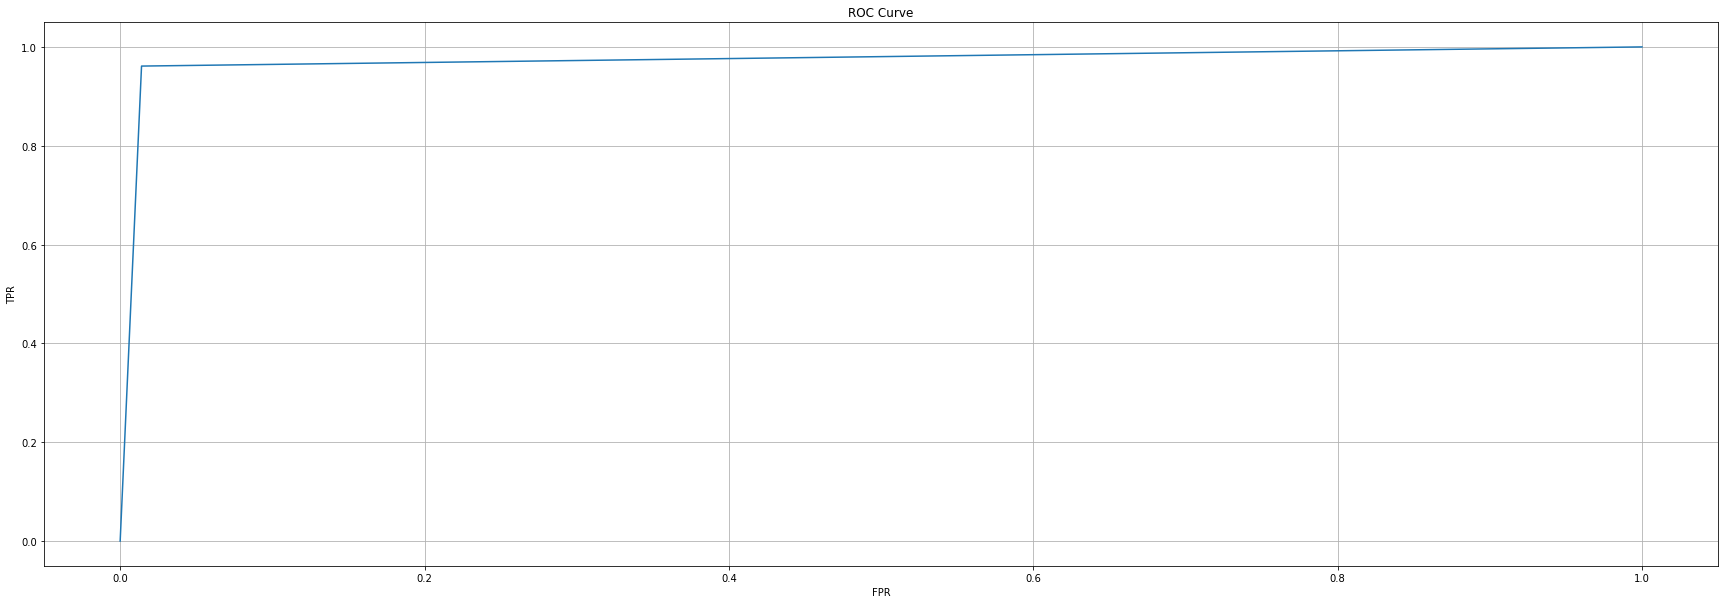

In [264]:
fpr, tpr, thresholds = roc_curve(y_train_data_it2,y_predict)
plt.figure()
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.grid()
plt.show()

### Precision - Recall Curve

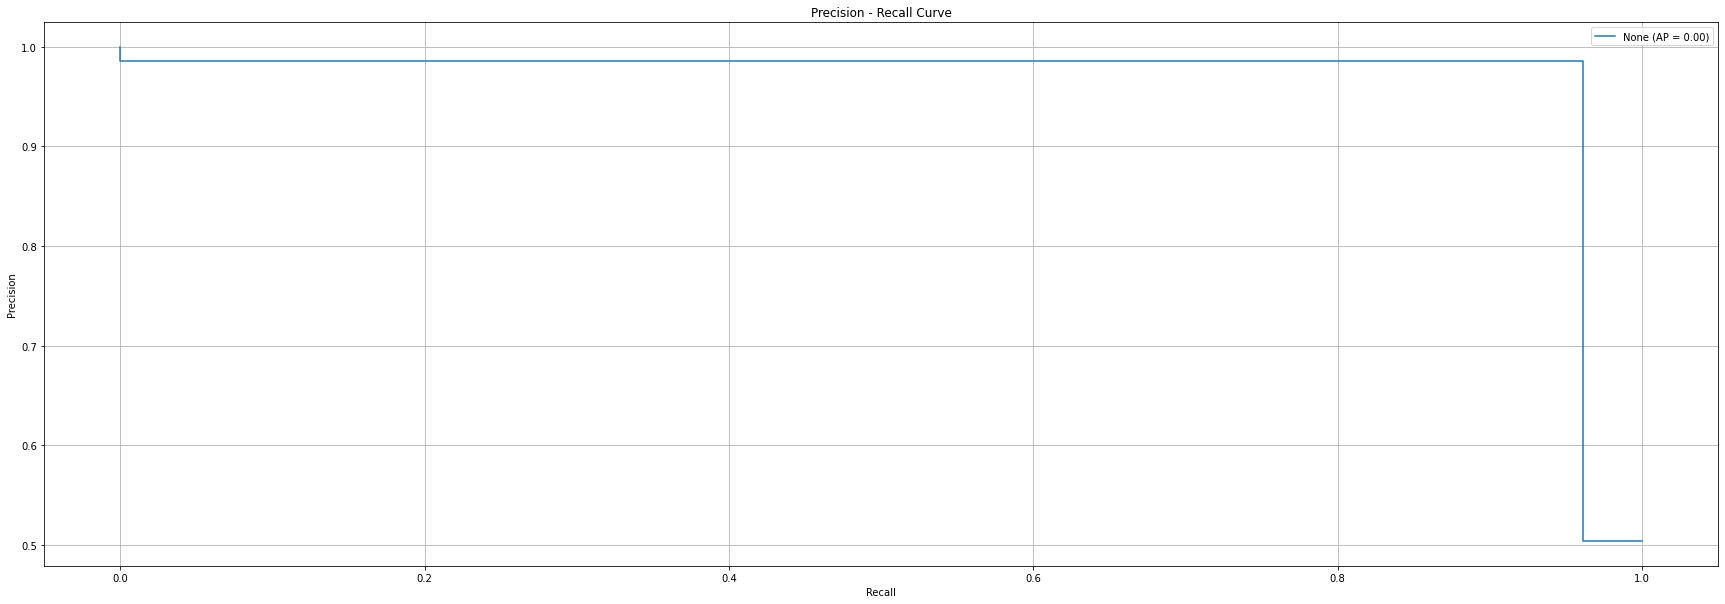

In [263]:
precision, recall, thresholds = precision_recall_curve(y_train_data_it2,y_predict)
display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=0, estimator_name=None)
display.plot()
plt.legend(loc=0)
plt.title('Precision - Recall Curve')
plt.grid()
plt.show()